<a href="https://colab.research.google.com/github/ajinkyapawar11/yolov8-crop-disease-monitoring/blob/main/Crop_Disease_Detection_Using_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Install Required Libraries

In [2]:
# Install the Ultralytics YOLOv8 library
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Upload and Extract the Dataset

In [5]:
# Upload the ZIP file from your local system
from google.colab import files
uploaded = files.upload()

# Extract the ZIP file to a working directory
import zipfile, os
zip_path = next(iter(uploaded))  # Get uploaded file name
extract_path = '/content/spinach_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted to:", extract_path)


Saving Bok Choy- Lettuce- Spinach- Diseased.v1i.yolov8.zip to Bok Choy- Lettuce- Spinach- Diseased.v1i.yolov8.zip
✅ Dataset extracted to: /content/spinach_dataset


3. Load the YOLOv8 Model

In [6]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 nano model (small and efficient)
model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 111MB/s]


4. Train the YOLOv8 Model

In [8]:
# Train the model on the spinach dataset
model.train(
    data='/content/spinach_dataset/Bok Choy- Lettuce- Spinach- Diseased.v1i.yolov8/data.yaml',
    epochs=10,
    imgsz=340,
    batch=16
)

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/spinach_dataset/Bok Choy- Lettuce- Spinach- Diseased.v1i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=340, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=

train: Scanning /content/spinach_dataset/Bok Choy- Lettuce- Spinach- Diseased.v1i.yolov8/train/labels.cache... 7479 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7479/7479 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 111, len(boxes) = 10584. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 709.0±486.9 MB/s, size: 49.2 KB)


val: Scanning /content/spinach_dataset/Bok Choy- Lettuce- Spinach- Diseased.v1i.yolov8/valid/labels... 705 images, 0 backgrounds, 0 corrupt: 100%|██████████| 705/705 [00:00<00:00, 1259.22it/s]

val: New cache created: /content/spinach_dataset/Bok Choy- Lettuce- Spinach- Diseased.v1i.yolov8/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 996. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 352 train, 352 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.684G     0.9787      1.911      1.345          8        352: 100%|██████████| 468/468 [01:20<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.97it/s]


                   all        705        996      0.306       0.49      0.358      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10     0.852G     0.8593      1.431      1.238         15        352: 100%|██████████| 468/468 [01:12<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.47it/s]


                   all        705        996      0.538      0.486      0.472      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.869G     0.8006      1.255      1.201         12        352: 100%|██████████| 468/468 [01:12<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.09it/s]

                   all        705        996      0.503      0.458      0.453      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.887G     0.7529      1.162      1.173         10        352: 100%|██████████| 468/468 [01:11<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.44it/s]

                   all        705        996       0.58       0.57      0.579      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10     0.904G     0.7031      1.046      1.141          9        352: 100%|██████████| 468/468 [01:12<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.63it/s]

                   all        705        996      0.638      0.625      0.626      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      0.92G     0.6651     0.9505      1.118         10        352: 100%|██████████| 468/468 [01:11<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.55it/s]

                   all        705        996      0.664      0.591       0.63      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.938G     0.6258      0.854      1.095          8        352: 100%|██████████| 468/468 [01:11<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.34it/s]

                   all        705        996       0.71      0.694      0.718      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10     0.955G     0.6019      0.784      1.085         11        352: 100%|██████████| 468/468 [01:12<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.53it/s]


                   all        705        996      0.691       0.68       0.74      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10     0.973G     0.5752     0.6981      1.069          8        352: 100%|██████████| 468/468 [01:11<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.60it/s]

                   all        705        996      0.763      0.737       0.77      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10     0.988G     0.5522     0.6415      1.058          9        352: 100%|██████████| 468/468 [01:11<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.55it/s]

                   all        705        996      0.767      0.762      0.789      0.495



10 epochs completed in 0.214 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.53it/s]


                   all        705        996      0.768      0.762      0.789      0.495
     Bok-Choy-Diseased        219        271      0.734      0.745      0.765      0.479
      Lettuce-Diseased        277        333      0.807      0.668      0.712      0.435
      Spinach-Diseased        209        392      0.763      0.875      0.889       0.57
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7febb1815c90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

5. Evaluate the Model Performance

In [9]:
# Evaluate the trained model on the validation set
metrics = model.val()

# Print mean Average Precision (mAP) scores
print("mAP@0.5:", metrics.box.map50)
print("mAP@0.5:0.95:", metrics.box.map)


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1438.3±606.7 MB/s, size: 55.2 KB)


val: Scanning /content/spinach_dataset/Bok Choy- Lettuce- Spinach- Diseased.v1i.yolov8/valid/labels.cache... 705 images, 0 backgrounds, 0 corrupt: 100%|██████████| 705/705 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 996. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  6.50it/s]


                   all        705        996      0.767      0.762      0.789      0.495
     Bok-Choy-Diseased        219        271      0.734      0.745      0.766      0.479
      Lettuce-Diseased        277        333      0.805      0.667      0.712      0.436
      Spinach-Diseased        209        392      0.763      0.875      0.889      0.569
Speed: 0.3ms preprocess, 2.1ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train22
mAP@0.5: 0.7887080904284544
mAP@0.5:0.95: 0.4945783460739927


6. Visualize Sample Predictions

In [15]:
results = model.predict(
    source='/content/spinach_dataset/Bok Choy- Lettuce- Spinach- Diseased.v1i.yolov8/valid/images',
    save=True
)



image 1/705 /content/spinach_dataset/Bok Choy- Lettuce- Spinach- Diseased.v1i.yolov8/valid/images/02_jpg.rf.4003bbf263f97097e6b47014cbd9e4f0.jpg: 352x352 1 Lettuce-Diseased, 8.4ms
image 2/705 /content/spinach_dataset/Bok Choy- Lettuce- Spinach- Diseased.v1i.yolov8/valid/images/04_png.rf.592b6364a1d8a311193de4d20b564c2d.jpg: 352x352 1 Lettuce-Diseased, 6.3ms
image 3/705 /content/spinach_dataset/Bok Choy- Lettuce- Spinach- Diseased.v1i.yolov8/valid/images/06_png.rf.18245fd95d9978c0b33793fab7af25ef.jpg: 352x352 1 Lettuce-Diseased, 6.2ms
image 4/705 /content/spinach_dataset/Bok Choy- Lettuce- Spinach- Diseased.v1i.yolov8/valid/images/07_jpg.rf.27c745c23805fe1dd37d5e77828db957.jpg: 352x352 1 Lettuce-Diseased, 6.4ms
image 5/705 /content/spinach_dataset/Bok Choy- Lettuce- Spinach- Diseased.v1i.yolov8/valid/images/09_jpg.rf.d2d59f648a5edc81aed712a3e3bcb4ed.jpg: 352x352 1 Lettuce-Diseased, 6.1ms
image 6/705 /content/spinach_dataset/Bok Choy- Lettuce- Spinach- Diseased.v1i.yolov8/valid/images/1

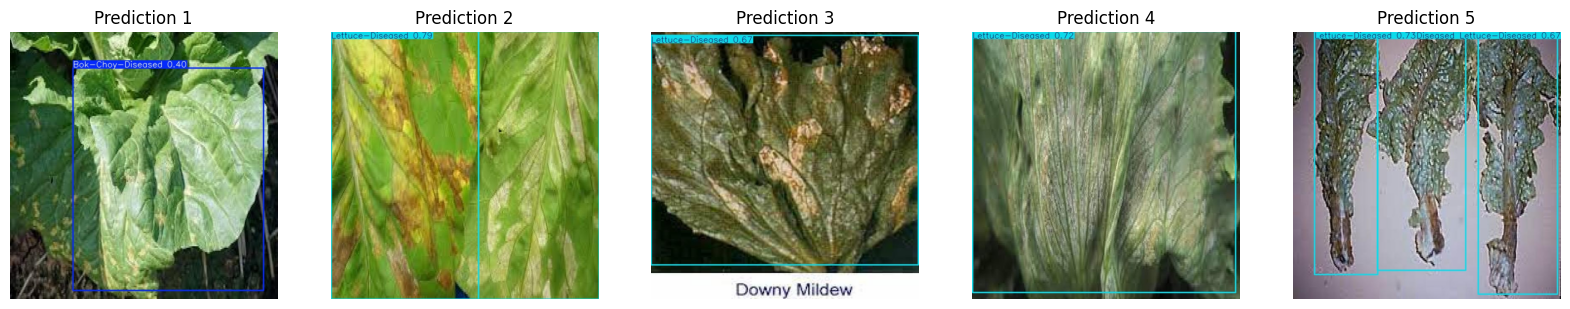

In [16]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image

# Find latest predict folder
predict_folders = sorted(glob.glob('runs/detect/train27'), key=os.path.getmtime)
if not predict_folders:
    print("❌ No prediction folders found. Please run model.predict() first.")
else:
    latest_predict_folder = predict_folders[-1]
    predicted_images = glob.glob(f'{latest_predict_folder}/*.jpg')

    if predicted_images:
        fig, axs = plt.subplots(1, min(5, len(predicted_images)), figsize=(20, 5))
        for i, path in enumerate(predicted_images[:5]):
            img = Image.open(path)
            axs[i].imshow(img)
            axs[i].axis('off')
            axs[i].set_title(f'Prediction {i+1}')
        plt.show()
    else:
        print("❌ No predicted images found in:", latest_predict_folder)
